# Check out Pb fields from test runs

In [38]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import pickle
import pandas as pd
import matplotlib

%matplotlib inline

#### Parameters:

In [2]:
# domain dimensions:
jmin, jmax = 159, 799
imin, imax = 1139, 2179

# Resolution of grid cells to sho# Station coordinates and names:
stn_n = np.array(['BB1', 'BB2', 'BB3', 'CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
          'CB1', 'CB2', 'CB3', 'CB4'])
stn_i = np.array([174, 337, 316, 444, 440, 431, 515, 515, 573, 554, 692, 582, 798, 848, 887, 969])
stn_j = np.array([405, 415, 382, 370, 365, 353, 311, 326, 313, 281, 281, 364, 332, 384, 457, 471])

# Dissolved trace metal observations
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')

Pb_data = Pb_data.rename(columns={"Depth.1": "Depth BB1", "Depth.2": "Depth BB2", "Depth.3": "Depth BB3", \
                        "Depth.4": "Depth CAA1", "Depth.5": "Depth CAA2", "Depth.6": "Depth CAA3", \
                        "Depth.7": "Depth CAA4", "Depth.8": "Depth CAA5", "Depth.9": "Depth CAA6", \
                        "Depth.10": "Depth CAA7", "Depth.11": "Depth CAA8", "Depth.12": "Depth CAA9", \
                        "Depth.13": "Depth CB1", "Depth.14": "Depth CB2", "Depth.15": "Depth CB3", \
                        "Depth.16": "Depth CB4"})

Pb_data[f'Depth CAA1'][6]  = np.NaN; Pb_data[f'Depth CAA2'][5]  = np.NaN;
Pb_data[f'Depth CAA2'][6]  = np.NaN; Pb_data[f'Depth CAA6'][4]  = np.NaN;
Pb_data[f'Depth CAA8'][8]  = np.NaN; Pb_data[f'Depth CAA8'][10] = np.NaN;
Pb_data[f'Depth CAA9'][8]  = np.NaN; 
Pb_data[f'Depth CB1'][8] = np.NaN;  Pb_data[f'Depth CB1'][9] = np.NaN;
Pb_data[f'Depth CB2'][1] = np.NaN;  Pb_data[f'Depth CB3'][20] = np.NaN;
Pb_data[f'Depth CB4'][11] = np.NaN; Pb_data[f'Depth CB4'][22] = np.NaN;

bottom_depths = [np.amax(Pb_data[f'Depth {stn}']) for stn in stn_n]w in figure:
grid_reso  = 10

land_color  = '#a9a7a2'

#### Load files:

In [3]:
mfile        = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mask_Pb-20220317.nc')
mesh_lon     = mfile['nav_lon'].values
mesh_lat     = mfile['nav_lat'].values
mask         = mfile['tmask'].values[0]
mesh_bathy   = mfile['tmask'].values[0,:,:,:]
bathy_masked = np.ma.masked_where((mesh_bathy> 0.1), mesh_bathy)
mesh_depth   = mfile['nav_lev'].values

In [18]:
folder1 = '/data/brogalla/run_storage/Pb-tuning-202210/Pb-tuning-202210-IC-spin0/'
folder2 = '/data/brogalla/run_storage/Pb-tuning-202210/Pb-tuning-202210-IC-spin2/'
file1   = xr.open_dataset(f'{folder1}ANHA12_EXH006_1m_20150101_20151231_comp_201501-201501.nc')
file2   = xr.open_dataset(f'{folder2}ANHA12_EXH006_1m_20150101_20151231_comp_201509-201509.nc')
dpb1    = file1['dissolpb'].values[0,:,:,:]
dpb2    = file2['dissolpb'].values[0,:,:,:]

In [42]:
# Station coordinates and names:
stn_n = np.array(['BB1', 'BB2', 'BB3', 'CAA1', 'CAA2', 'CAA3', 'CAA4', 'CAA5', 'CAA6', 'CAA7', 'CAA8', 'CAA9', \
          'CB1', 'CB2', 'CB3', 'CB4'])

# Dissolved trace metal observations
Pb_data = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')

Pb_data = Pb_data.rename(columns={"Depth.1": "Depth BB1", "Depth.2": "Depth BB2", "Depth.3": "Depth BB3", \
                        "Depth.4": "Depth CAA1", "Depth.5": "Depth CAA2", "Depth.6": "Depth CAA3", \
                        "Depth.7": "Depth CAA4", "Depth.8": "Depth CAA5", "Depth.9": "Depth CAA6", \
                        "Depth.10": "Depth CAA7", "Depth.11": "Depth CAA8", "Depth.12": "Depth CAA9", \
                        "Depth.13": "Depth CB1", "Depth.14": "Depth CB2", "Depth.15": "Depth CB3", \
                        "Depth.16": "Depth CB4"})

Pb_data[f'Depth CAA1'][6]  = np.NaN; Pb_data[f'Depth CAA2'][5]  = np.NaN;
Pb_data[f'Depth CAA2'][6]  = np.NaN; Pb_data[f'Depth CAA6'][4]  = np.NaN;
Pb_data[f'Depth CAA8'][8]  = np.NaN; Pb_data[f'Depth CAA8'][10] = np.NaN;
Pb_data[f'Depth CAA9'][8]  = np.NaN; 
Pb_data[f'Depth CB1'][8] = np.NaN;  Pb_data[f'Depth CB1'][9] = np.NaN;
Pb_data[f'Depth CB2'][1] = np.NaN;  Pb_data[f'Depth CB3'][20] = np.NaN;
Pb_data[f'Depth CB4'][11] = np.NaN; Pb_data[f'Depth CB4'][22] = np.NaN;

bottom_depths = [np.amax(Pb_data[f'Depth {stn}']) for stn in stn_n];

stn_names = Pb_data['Station names'].dropna().astype('str')
obs_lons  = Pb_data['station lon'].astype('float').dropna().values
obs_lats  = Pb_data['Station lat'].astype('float').dropna().values

/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/brogalla/miniconda3/envs/julab/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

#### Figure:

In [57]:
Pb_data[f'BB1'][0]

0.0136

In [64]:
def plot_layer(variable, layers, vmin=0, vmax=30, cmap1=cmocean.cm.thermal, obs=False):
    
    fig, ax, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/Pb6.pickle','rb'))

    x, y = proj1(mesh_lon[imin:imax,jmin:jmax], mesh_lat[imin:imax,jmin:jmax]) 
    
    for n, axis in enumerate(ax.ravel()):

        CB = axis.pcolormesh(x, y, variable[layers[n],:,:]*1e12, cmap=cmap1, vmin=vmin, vmax=vmax) 
        axis.contourf(x, y, bathy_masked[layers[n],imin:imax,jmin:jmax], colors=[land_color], zorder=2) # Mask land at particular depth
        axis.set_title(f'Depth: {mesh_depth[layers[n]]:.1f} m', fontsize=6)
        
        if obs: #plot circles with observations
            x_obs, y_obs = proj1(obs_lons, obs_lats)
 
            dpb_obs = []
            for stn in stn_names:
                try:
                    ind = np.argmin(np.abs(Pb_data[f'Depth {stn}']-mesh_depth[layers[n]])) # index of nearest depth observation
                    min_value = np.min(np.abs(Pb_data[f'Depth {stn}']-mesh_depth[layers[n]]))
#                     print(f'{stn}, depth: {mesh_depth[layers[n]]}, index: {ind}, depth_diff: {min_value}')

                    if min_value <= 50:          
                        dpb_obs.append(Pb_data[f'{stn}'][ind]*1e3)
                    else:
                        dpb_obs.append(np.nan)
                except:
                    dpb_obs.append(np.nan)
            
            CB1 = axis.scatter(x_obs, y_obs, c=dpb_obs, s=15, edgecolor='w', linewidth=0.5, \
                                zorder=5, vmin=vmin, vmax=vmax, cmap=cmap1)
            
    
#     Color bar: --------------------------------------------------------------------------------
    cbaxes = fig.add_axes([0.03, 0.55, 0.02, 0.18]);
    CBar   = plt.colorbar(CB, ax=ax[0,0], cax=cbaxes); 
    CBar.set_label('Dissolved Pb [pM]', fontsize=6)
    CBar.ax.tick_params(axis='y', length=0, labelsize=6)
    
    return

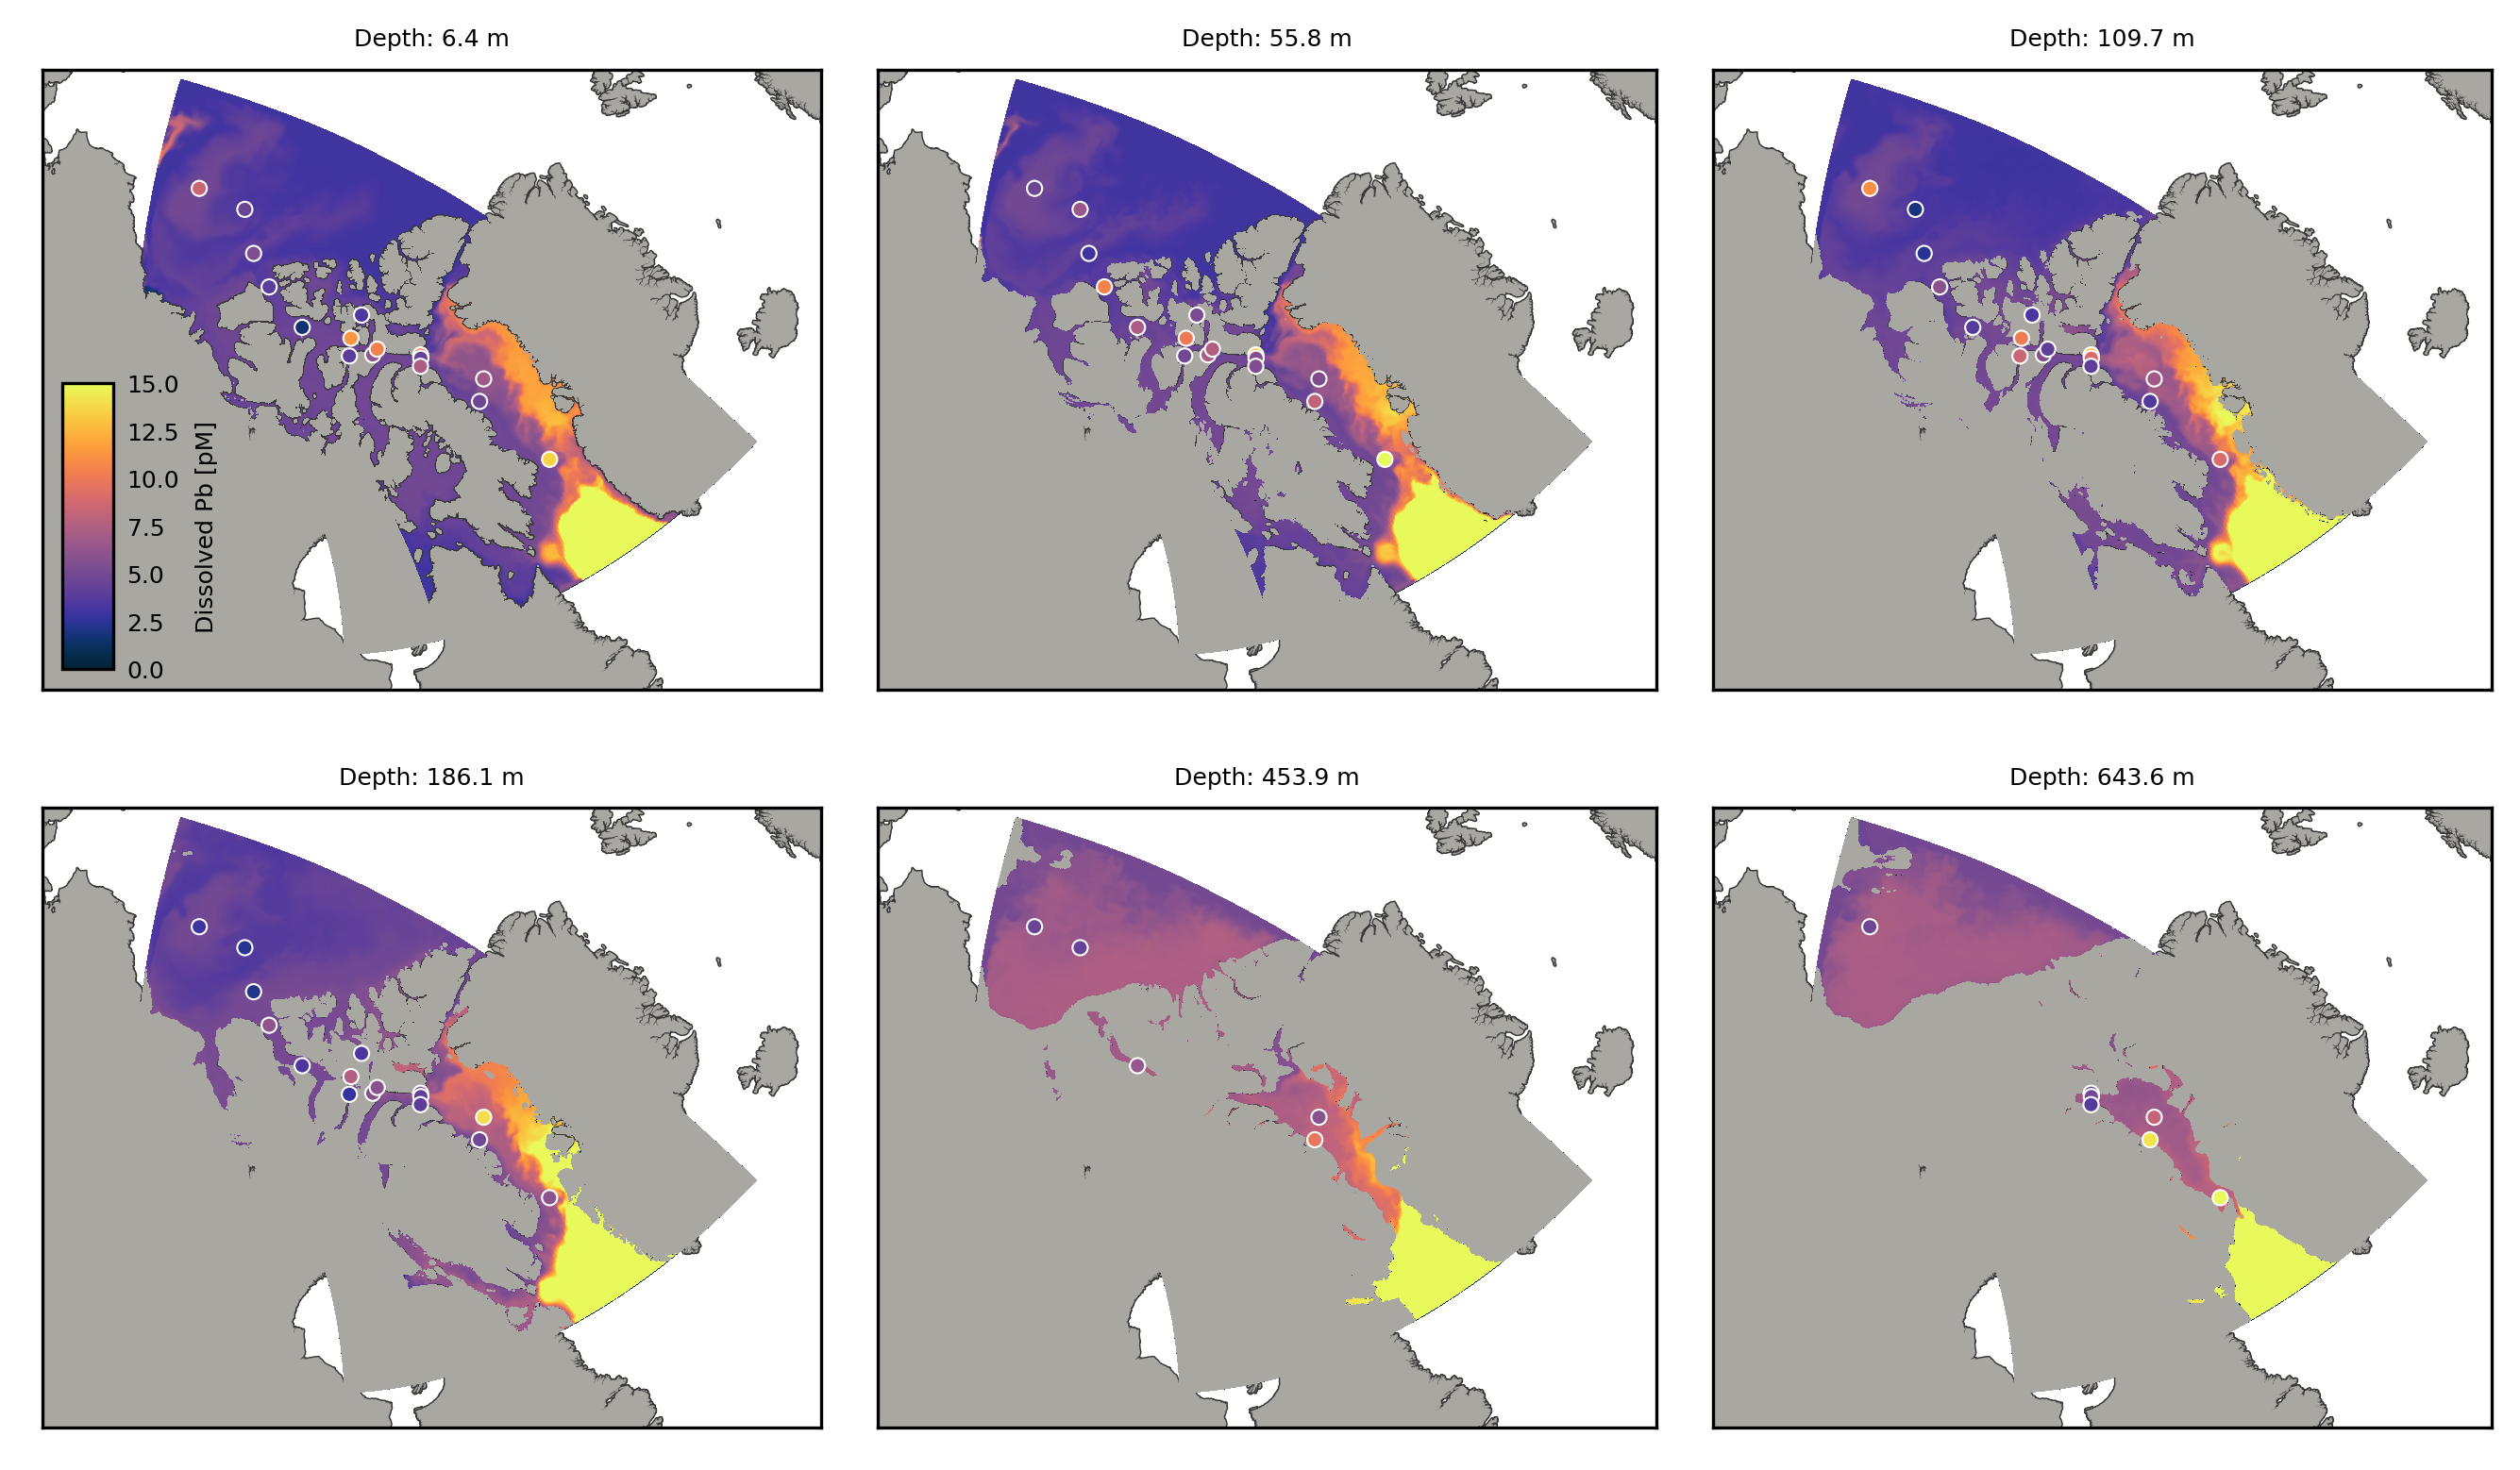

In [67]:
plot_layer(dpb2, (5,18,22,25,30,32), vmin=0, vmax=15, cmap1=cmocean.cm.thermal, obs=True)

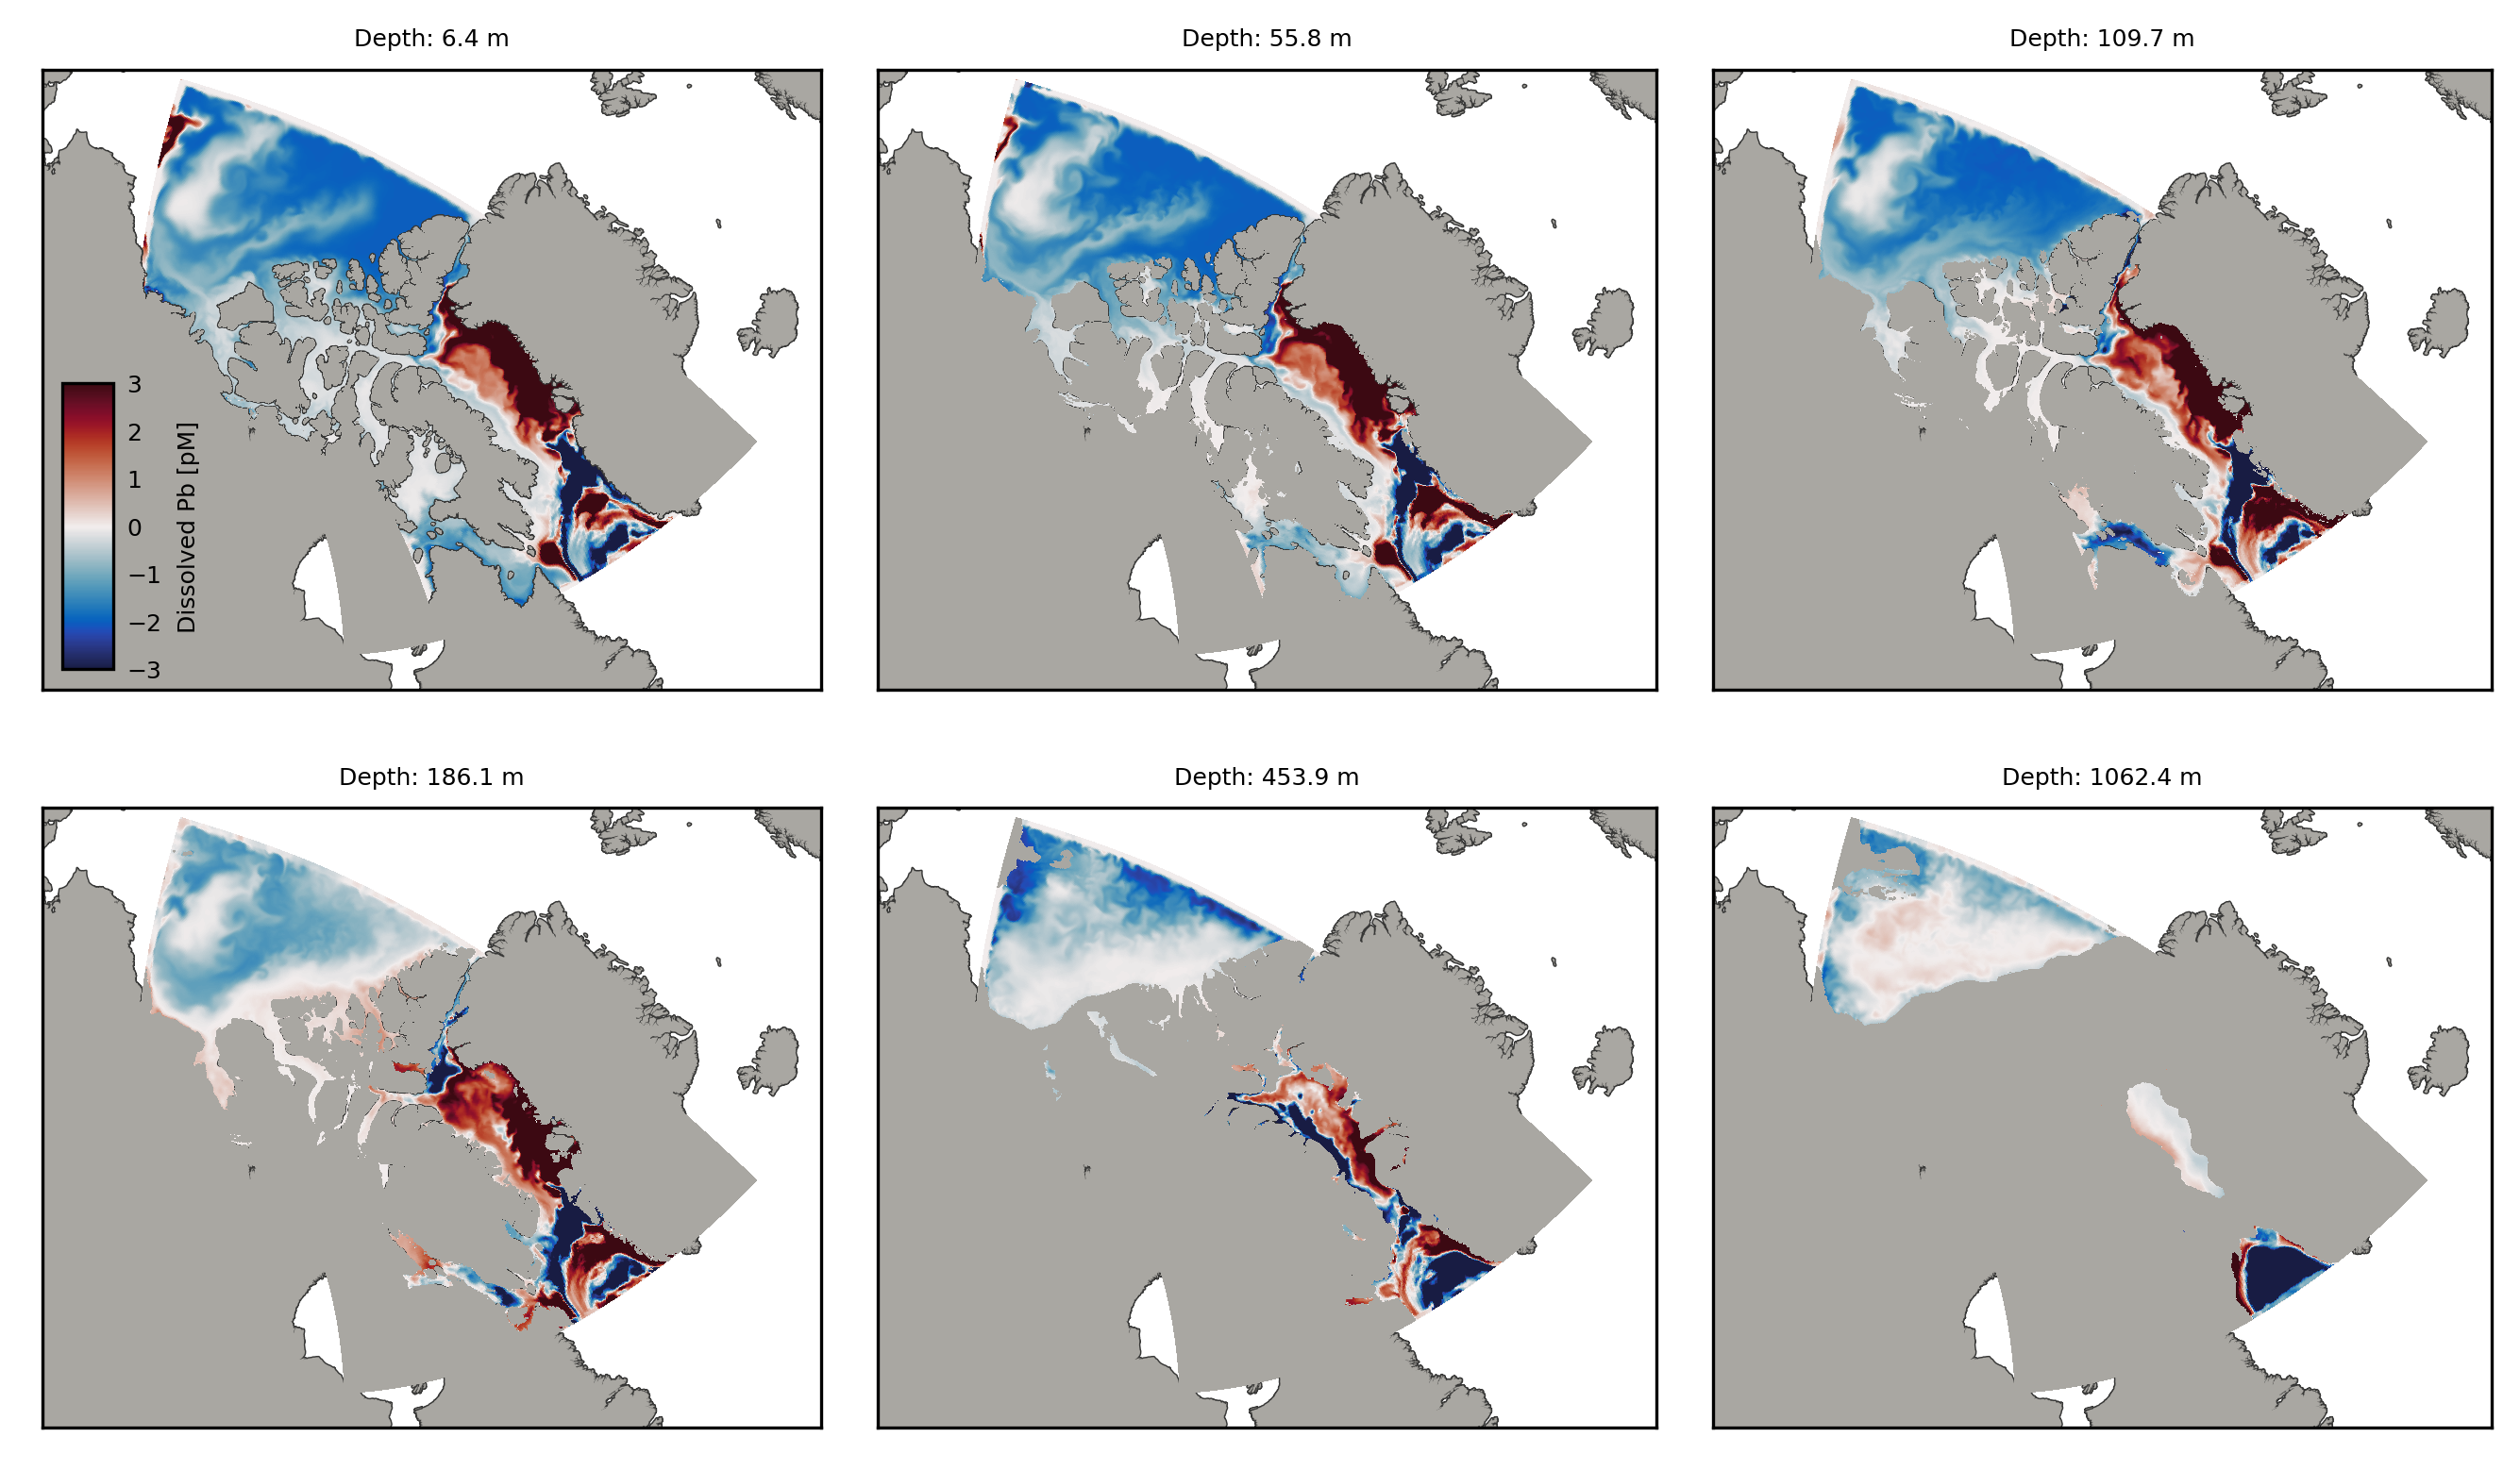

In [50]:
plot_layer(dpb2-dpb1, (5,18,22,25,30,35), vmin=-3, vmax=3, cmap1=cmocean.cm.balance)